# Trabajo Final
Mariano Giongrande
Comisión: 61170

## Presentación del proyecto

El presente trabajo busca analizar los delitos cometidos en la Ciudad Autónoma de Buenos Aires durante el año 2023. Para ello se trabajó con el dataset correspondiente a dicho período descargado de https://data.buenosaires.gob.ar/dataset/delitos y subido a mi github.

Se busca cuantificar los delitos por tipo, por día de ocurrencia, relacionar franja horaria y día, tendencia a lo largo del año por tipo con el objetivo de determinar patrones: comuna o comunas con mayor cantidad de delitos, franjas horarias con mayor cantidad de delitos, validar si a lo largo del año la cantidad de delitos por tipo es estable o presentan tendencias.

Se parte de las siguientes hipótesis: las comunas con mayor cantidad de delitos serían la Comuna 1 (centro), 2 (Recoleta) y 14 (Palermo).

Las franjas horarias con mayor cantidad de delitos corresponde a las franjas de mayor movimiento de gente: mañana (de 7 a 10), mediodía (de 12 a 14) y tarde (de 17 a 19).

A partir de las hipótesis mencionadas y los análisis hechos el objetivo es desarrollar un modelo de Machine Learning que permita predecir la cantidad de delitos por día, franja horaria, tipo y comouna. Para ello se realizará una regresión lineal múltiple. En el punto en que se desarrolle el modelo se explicarán los supuestos que deben cumplir estos tipos de modelos, utilizando como referencia el libro Econometría, Editorial McGraw Hill, Cuarta Edición, de Damodar Gujarati.

## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Funciones útiles

In [ ]:
def actualizarDatasetDesdeArray(dataset,columna, array):
    for item in array:
        dataset[columna] = dataset[columna].apply(lambda x: item[1] if x == item[0] else x)

def actualizarDatasetDesdeMatriz(dataset,columna1,columna2,matriz):
    for dato1,dato2 in matriz:
        dataset.loc[dataset[columna1]==dato1,[columna2]] = dato2

def generarTitulo(titulo): return f'{titulo} - 2023'

## Dataset

In [ ]:
file = 'https://raw.githubusercontent.com/mgiongrande/DataScience1/main/delitos_2023.csv'

## Importación

In [ ]:
data = pd.read_csv(file,sep=';')

## Descripción de las variables del dataset

id-sum: ID del registro

anio: año del delito

mes: mes del delito

dia: día de la semana del delito

fecha: fecha del delito

franja: franja horaria del delito

tipo: tipo de delito

subtipo: subtipo de delito (cada tipo tiene uno o más subtipos)


uso_arma: si se usó un arma en el delito

uso_moto: si se usó una moto en el delito

barrio: barrio donde sucedió el delito

comuna: comuna en la cual se cometió el delito

latitud, longitud: coordenadas del delito

cantidad: cantidad de delitos para ese registro. Siempre es uno ya que registra denuncia por denuncia.

## Limpieza y transformación de datos

In [ ]:
# Visualizo la información del DF para ver si faltan datos y los tipos de datos de las columnas.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id-sum    157461 non-null  int64 
 1   anio      157461 non-null  int64 
 2   mes       157461 non-null  object
 3   dia       157461 non-null  object
 4   fecha     157461 non-null  object
 5   franja    157461 non-null  int64 
 6   tipo      157461 non-null  object
 7   subtipo   157461 non-null  object
 8   uso_arma  157461 non-null  object
 9   uso_moto  157461 non-null  object
 10  barrio    156779 non-null  object
 11  comuna    156795 non-null  object
 12  latitud   154642 non-null  object
 13  longitud  154642 non-null  object
 14  cantidad  157461 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 18.0+ MB


In [ ]:
data.shape

(157461, 15)

In [ ]:
data.dtypes.value_counts()

,count
object,11
int64,4


In [ ]:
# Listo los primeros registros.

data.head(10)

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,ENERO,LUNES,2/01/2023,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.445.747,-34.559.570,1
1,2,2023,ENERO,MIERCOLES,11/01/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58.476.557,-34.673.096,1
2,3,2023,ENERO,VIERNES,13/01/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.485.670,-34.544.011,1
3,4,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
4,5,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
5,6,2023,ENERO,SABADO,21/1/2023,0,Vialidad,Muertes por siniestros viales,NO,NO,SD,NaN,NaN,NaN,1
6,7,2023,ENERO,MARTES,24/01/2023,9,Vialidad,Muertes por siniestros viales,NO,NO,BALVANERA,3,-58.392.520,-34.606.668,1
7,8,2023,FEBRERO,JUEVES,2/02/2023,22,Vialidad,Muertes por siniestros viales,NO,NO,RECOLETA,2,-58.405526,\n-34.592493,1
8,9,2023,FEBRERO,DOMINGO,5/02/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.488.723,-34.554.966,1
9,10,2023,FEBRERO,MIERCOLES,8/02/2023,18,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.450.032,-34.557.864,1


In [ ]:
# Valores nulos

data.isna().sum()

,0
id-sum,0
anio,0
mes,0
dia,0
fecha,0
franja,0
tipo,0
subtipo,0
uso_arma,0
uso_moto,0


In [ ]:
# Analizo los barrios para encontrar una estrategia para solucionar los faltantes y verificar si hay duplicados o con errores en los nombres.

data.barrio.unique()

array(['BELGRANO', 'VILLA LUGANO', 'SAAVEDRA', 'PARQUE CHACABUCO', 'SD',
       'BALVANERA', 'RECOLETA', 'MONTE CASTRO', 'VILLA URQUIZA',
       'VILLA SOLDATI', 'NUEVA POMPEYA', 'BARRACAS', 'CHACARITA',
       'LINIERS', 'FLORES', 'PALERMO', 'FLORESTA', 'CONSTITUCION',
       'VILLA DEL PARQUE', 'BOEDO', 'MATADEROS', 'CABALLITO',
       'VELEZ SARSFIELD', 'VILLA PUEYRREDON', 'VILLA LURO',
       'PARQUE PATRICIOS', 'LA BOCA', 'VILLA DEVOTO', 'SAN TELMO',
       'VILLA CRESPO', 'VILLA RIACHUELO', nan, 'COLEGIALES', 'NUÑEZ',
       'CONTITUCIÓN', 'VILLA GRAL. MITRE', 'VILLA ORTUZAR', 'PATERNAL',
       'RETIRO', 'ALMAGRO', 'PARQUE AVELLANEDA', 'PUERTO MADERO',
       'SAN NICOLAS', 'SAN CRISTOBAL', 'MONSERRAT', 'BOCA', 'PARQUE CHAS',
       'VILLA REAL', 'VERSALLES', 'VILLA SANTA RITA', 'COGHLAN',
       'AGRONOMIA', 'RODRIGO BUENO', 'AV BOEDO', 'NO ESPECIFICADA',
       'GREGORIO DE LAFERRERE', 'FLORIDA', 'BERNAL', 'DOCK SUD', '0',
       'SANTA MARÍA', 'BANFIELD OESTE', 'VILLA LUZURIA

In [ ]:
#Actualizo el nombre de los barrios que están mal a partir de la moda del barrio de la comuna

barrios = ['Sin geo','SD','0','BERNAL','NO ESPECIFICADA','GREGORIO DE LAFERRERE','AV BOEDO','BANFIELD OESTE','VILLA LUZURIAGA','CASEROS','FLORIDA','RODRIGO BUENO','SANTA MARÍA','DOCK SUD']

for barrio in barrios:
    comunas = (data.loc[data['barrio'] == barrio,['comuna']]).comuna.unique()
    for comuna in comunas:
        modaBarrio = data.loc[(data['comuna'] == comuna) & (~data['comuna'].isna()), ['barrio']].mode()
        data.loc[(data['barrio'] == barrio) & (data['comuna'] == comuna),['barrio']] = modaBarrio

In [ ]:
# Reviso nuevamente los barrios para ver si quedó algo más para revisar

data.barrio.unique()

array(['BELGRANO', 'VILLA LUGANO', 'SAAVEDRA', 'PARQUE CHACABUCO', 'SD',
       'BALVANERA', 'RECOLETA', 'MONTE CASTRO', 'VILLA URQUIZA',
       'VILLA SOLDATI', 'NUEVA POMPEYA', 'BARRACAS', 'CHACARITA',
       'LINIERS', 'FLORES', 'PALERMO', 'FLORESTA', 'CONSTITUCION',
       'VILLA DEL PARQUE', 'BOEDO', nan, 'MATADEROS', 'CABALLITO',
       'VELEZ SARSFIELD', 'VILLA PUEYRREDON', 'VILLA LURO',
       'PARQUE PATRICIOS', 'LA BOCA', 'VILLA DEVOTO', 'SAN TELMO',
       'VILLA CRESPO', 'VILLA RIACHUELO', 'COLEGIALES', 'NUÑEZ',
       'CONTITUCIÓN', 'VILLA GRAL. MITRE', 'VILLA ORTUZAR', 'PATERNAL',
       'RETIRO', 'ALMAGRO', 'PARQUE AVELLANEDA', 'PUERTO MADERO',
       'SAN NICOLAS', 'SAN CRISTOBAL', 'MONSERRAT', 'BOCA', 'PARQUE CHAS',
       'VILLA REAL', 'VERSALLES', 'VILLA SANTA RITA', 'COGHLAN',
       'AGRONOMIA', 'NUNEZ', 'VILLA GENERAL MITRE', 'VILLA ´PUEYRREDON'],
      dtype=object)

In [ ]:
# Verifico el barrio SD...

data.loc[data.barrio == 'SD']

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
5,6,2023,ENERO,SABADO,21/1/2023,0,Vialidad,Muertes por siniestros viales,NO,NO,SD,NaN,NaN,NaN,1


In [ ]:
# Como no tengo datos para estimarlo, elimino el registro.

data.drop(data[data.barrio == 'SD'].index, inplace=True)

In [ ]:
#Ahora chequeo los barrios NaN

data.loc[data.barrio.isna(),['id-sum','comuna']].groupby(['comuna']).count()

,id-sum
comuna,
1,157
10,12
11,72
12,32
13,22
14,30
15,37
2,43
3,56


In [ ]:
# Analizo las comunas sin geo para ver si hay alguna que tenga dato del barrio...

data.loc[(data['comuna'] == 'Sin geo') & ~data['barrio'].isna()]

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad


In [ ]:
# Elimino los barrios NaN con comuna SinGeo...

data.drop(data[(data.comuna == 'Sin geo') & (data.barrio.isna())].index, inplace=True)

In [ ]:
# Verifico los barrios NaN y comunas Nan

data[data.barrio.isna() & data.comuna.isna()]

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
63,64,2023,JULIO,SABADO,15/07/2023,8,Vialidad,Muertes por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
71,72,2023,AGOSTO,VIERNES,18/8/2023,10,Vialidad,Muertes por siniestros viales,NO,NO,NaN,NaN,-58.472.130,-34.584.957,1
74,75,2023,AGOSTO,MARTES,29/8/2023,18,Vialidad,Muertes por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
79,80,2023,SEPTIEMBRE,VIERNES,15/9/2023,14,Vialidad,Muertes por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
92,93,2023,OCTUBRE,MARTES,31/10/2023,1,Vialidad,Muertes por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10383,10384,2023,DICIEMBRE,VIERNES,22/12/2023,12,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
10426,10427,2023,OCTUBRE,LUNES,9/10/2023,18,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
10436,10437,2023,DICIEMBRE,VIERNES,8/12/2023,19,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1
10438,10439,2023,DICIEMBRE,DOMINGO,10/12/2023,16,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,NaN,NaN,NaN,1


In [ ]:
# Las elimino ya que carezco de datos para su estimación

data.drop(data[data.barrio.isnull() & data.comuna.isna()].index,inplace=True)

In [ ]:
# Verifico los barrios NaN

data.loc[data.barrio.isna()]

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
37,38,2023,MAYO,VIERNES,5/05/2023,15,Vialidad,Muertes por siniestros viales,NO,NO,NaN,12,NaN,NaN,1
69,70,2023,AGOSTO,MARTES,1/08/2023,18,Vialidad,Muertes por siniestros viales,NO,NO,NaN,1,0,0,1
88,89,2023,OCTUBRE,VIERNES,13/10/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,NaN,3,NaN,NaN,1
1464,1465,2023,AGOSTO,MARTES,15/8/2023,22,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,4,NaN,NaN,1
5257,5258,2023,JUNIO,LUNES,26/6/2023,19,Vialidad,Lesiones por siniestros viales,NO,NO,NaN,7,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29642,29643,2023,DICIEMBRE,VIERNES,22/12/2023,0,Amenazas,Amenazas,NO,NO,NaN,4,0,0,1
29648,29649,2023,DICIEMBRE,SÁBADO,23/12/2023,13,Amenazas,Amenazas,NO,NO,NaN,4,NaN,NaN,1
29669,29670,2023,DICIEMBRE,DOMINGO,24/12/2023,8,Amenazas,Amenazas,NO,NO,NaN,12,NaN,NaN,1
29714,29715,2023,DICIEMBRE,MARTES,26/12/2023,10,Amenazas,Amenazas,NO,NO,NaN,8,0,0,1


In [ ]:
barrios = data.barrio.unique()

data.loc[~data['comuna'].isna(),['barrio','comuna','cantidad']].groupby(['barrio','comuna']).count().reset_index()

,barrio,comuna,cantidad
0,AGRONOMIA,15,120
1,AGRONOMIA,CC-15,440
2,ALMAGRO,14,4
3,ALMAGRO,15,8
4,ALMAGRO,5,790
...,...,...,...
164,VILLA SOLDATI,CC-08,2518
165,VILLA URQUIZA,12,584
166,VILLA URQUIZA,15,9
167,VILLA URQUIZA,CC-12,2451


In [ ]:
# Elimino el CC- de las comunas...

data.loc[(~data['comuna'].isna()) & (data['comuna'].str.contains('CC')),['comuna']] = data.loc[(~data['comuna'].isna()) & (data['comuna'].str.contains('CC')),['comuna']].apply(lambda x: x[3:5])

In [ ]:
# Como encontramos barrios que tienen varias comunas (lo cual está mal), verifico si la más frecuente es la comuna correcta...

barrios = data.barrio.unique()

barrioModaComuna = []

for barrio in barrios:
  moda = data[(data['barrio'] == barrio) & (~data['comuna'].isna())]
  if len(moda.mode()) > 0:
    barrioModaComuna.append([barrio,int(moda.mode().comuna[0])])


In [ ]:
# Con una lista que relaciona correctamente barrios y comunas valido si las modas calculadas están OK...

barrioComuna = [['BELGRANO',13],['VILLA LUGANO',8],['SAAVEDRA',12],['PARQUE CHACABUCO',7],
                ['BALVANERA',3],['RECOLETA',2],['MONTE CASTRO',10],['VILLA URQUIZA',12],
                ['VILLA SOLDATI',8], ['NUEVA POMPEYA',4], ['BARRACAS',4], ['CHACARITA',15],
                ['LINIERS',9], ['FLORES',7], ['PALERMO',14], ['FLORESTA',10], ['CONSTITUCION',1],
                ['VILLA DEL PARQUE',11], ['BOEDO',5], ['MATADEROS',9], ['CABALLITO',6],
                ['VELEZ SARSFIELD',10], ['VILLA PUEYRREDON',12], ['VILLA LURO',10],
                ['PARQUE PATRICIOS',4], ['BOCA',4], ['VILLA DEVOTO',11], ['SAN TELMO',1],
                ['VILLA CRESPO',15], ['VILLA RIACHUELO',8], ['COLEGIALES',13], ['NUÑEZ',13],
                ['VILLA GRAL. MITRE',11], ['VILLA ORTUZAR',15], ['PATERNAL',15], ['RETIRO',1],
                ['ALMAGRO',5], ['PARQUE AVELLANEDA',9], ['PUERTO MADERO',1], ['SAN NICOLAS',1],
                ['SAN CRISTOBAL',3], ['MONSERRAT',1], ['PARQUE CHAS',15], ['VILLA REAL',10],
                ['VERSALLES',10], ['VILLA SANTA RITA',11], ['COGHLAN',12], ['AGRONOMIA',15]]

encontrados = []

for barrio,comuna in barrioModaComuna:
    contador = 0
    for idx,element in enumerate(barrioComuna):
      if element == [barrio,comuna]:
        encontrados.append([barrio,comuna,True])
        break
      else:
        contador+=1
      if contador == len(barrioComuna):
        encontrados.append([barrio,comuna,False])

In [ ]:
# Los únicos FALSE son barrios repetidos, por lo tanto la moda de comunas calculada a partir de los barrios es válido.

encontrados

[['BELGRANO', 13, True],
 ['VILLA LUGANO', 8, True],
 ['SAAVEDRA', 12, True],
 ['PARQUE CHACABUCO', 7, True],
 ['BALVANERA', 3, True],
 ['RECOLETA', 2, True],
 ['MONTE CASTRO', 10, True],
 ['VILLA URQUIZA', 12, True],
 ['VILLA SOLDATI', 8, True],
 ['NUEVA POMPEYA', 4, True],
 ['BARRACAS', 4, True],
 ['CHACARITA', 15, True],
 ['LINIERS', 9, True],
 ['FLORES', 7, True],
 ['PALERMO', 14, True],
 ['FLORESTA', 10, True],
 ['CONSTITUCION', 1, True],
 ['VILLA DEL PARQUE', 11, True],
 ['BOEDO', 5, True],
 ['MATADEROS', 9, True],
 ['CABALLITO', 6, True],
 ['VELEZ SARSFIELD', 10, True],
 ['VILLA PUEYRREDON', 12, True],
 ['VILLA LURO', 10, True],
 ['PARQUE PATRICIOS', 4, True],
 ['LA BOCA', 4, False],
 ['VILLA DEVOTO', 11, True],
 ['SAN TELMO', 1, True],
 ['VILLA CRESPO', 15, True],
 ['VILLA RIACHUELO', 8, True],
 ['COLEGIALES', 13, True],
 ['NUÑEZ', 13, True],
 ['VILLA GRAL. MITRE', 11, True],
 ['VILLA ORTUZAR', 15, True],
 ['PATERNAL', 15, True],
 ['RETIRO', 1, True],
 ['ALMAGRO', 5, True],
 ['

In [ ]:
# Actualizo los barrios NaN a partir de la moda de las comunas

comunas = data[data.barrio.isna()].comuna.unique()

for comuna in comunas:
    modaBarrio = data.loc[(data['comuna'] == comuna) & (~data['comuna'].isna()), ['barrio']].mode()
    data.loc[(data['barrio'].isna()) & (data['comuna'] == comuna),['barrio']] = modaBarrio.barrio[0]

In [ ]:
# Agrupo los barrios para ver si falta corregir algo más.

data[['barrio','id-sum']].groupby(['barrio']).count()

,id-sum
barrio,
AGRONOMIA,560
ALMAGRO,5857
BALVANERA,9689
BARRACAS,5566
BELGRANO,5029
BOCA,2641
BOEDO,2115
CABALLITO,6443
CHACARITA,2276


In [ ]:
# Actualizo los nombres de los barrios "duplicados"

actualizables = [['NUNEZ','NUÑEZ'],['CONTITUCIÓN','CONSTITUCION'],
                 ['VILLA ´PUEYRREDON','VILLA PUEYRREDON'],
                 ['VILLA GENERAL MITRE','VILLA GRAL. MITRE'],['LA BOCA','BOCA']]

actualizarDatasetDesdeArray(data,'barrio',actualizables)

In [ ]:
# Actualizo las comunas en función al barrio

barrioComuna = [['BELGRANO',13],['VILLA LUGANO',8],['SAAVEDRA',12],['PARQUE CHACABUCO',7],
                ['BALVANERA',3],['RECOLETA',2],['MONTE CASTRO',10],['VILLA URQUIZA',12],
                ['VILLA SOLDATI',8], ['NUEVA POMPEYA',4], ['BARRACAS',4], ['CHACARITA',15],
                ['LINIERS',9], ['FLORES',7], ['PALERMO',14], ['FLORESTA',10], ['CONSTITUCION',1],
                ['VILLA DEL PARQUE',11], ['BOEDO',5], ['MATADEROS',9], ['CABALLITO',6],
                ['VELEZ SARSFIELD',10], ['VILLA PUEYRREDON',12], ['VILLA LURO',10],
                ['PARQUE PATRICIOS',4], ['BOCA',4], ['VILLA DEVOTO',11], ['SAN TELMO',1],
                ['VILLA CRESPO',15], ['VILLA RIACHUELO',8], ['COLEGIALES',13], ['NUÑEZ',13],
                ['VILLA GRAL. MITRE',11], ['VILLA ORTUZAR',15], ['PATERNAL',15], ['RETIRO',1],
                ['ALMAGRO',5], ['PARQUE AVELLANEDA',9], ['PUERTO MADERO',1], ['SAN NICOLAS',1],
                ['SAN CRISTOBAL',3], ['MONSERRAT',1], ['PARQUE CHAS',15], ['VILLA REAL',10],
                ['VERSALLES',10], ['VILLA SANTA RITA',11], ['COGHLAN',12], ['AGRONOMIA',15]]

actualizarDatasetDesdeMatriz(data,'barrio','comuna',barrioComuna)

In [ ]:
# Verifico los datos de la columna uso_arma

data[['id-sum','uso_arma']].groupby(['uso_arma']).count()

,id-sum
uso_arma,
NO,147229
SI,9227


In [ ]:
# Verifico los datos de la columna uso_moto

data[['id-sum','uso_moto']].groupby(['uso_moto']).count()

,id-sum
uso_moto,
NO,152022
SI,4434


In [ ]:
# Los actualizo por 0 y 1

data.uso_arma = data.uso_arma.apply(lambda x: 1 if x == 'SI' else 0)
data.uso_moto = data.uso_moto.apply(lambda x: 1 if x == 'SI' else 0)

In [ ]:
# Chequeo los meses

data.mes.unique()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype=object)

In [ ]:
# Armo una matriz con nombre del mes y número del mes y creo la columna correspondiente en el DF

meses = [['ENERO',1],['FEBRERO',2],['MARZO',3],
         ['ABRIL',4],['MAYO',5],['JUNIO',6],
         ['JULIO',7],['AGOSTO',8],['SEPTIEMBRE',9],
         ['OCTUBRE',10],['NOVIEMBRE',11],['DICIEMBRE',12]]

data['nro_mes'] = 0

actualizarDatasetDesdeMatriz(data,'mes','nro_mes',meses)

In [ ]:
# Verifico los días

data.dia.unique()

array(['LUNES', 'MIERCOLES', 'VIERNES', 'MARTES', 'JUEVES', 'DOMINGO',
       'SABADO', 'SÁBADO', 'MIÉRCOLES'], dtype=object)

In [ ]:
# Actualizo los días sin tilde

diasActualizables = [['SABADO','SÁBADO'],['MIERCOLES','MIÉRCOLES']]

actualizarDatasetDesdeArray(data,'dia',diasActualizables)

In [ ]:
# Armo una matriz con nombre del día y número del día y creo la columna correspondiente en el DF

dias = [['DOMINGO',1],['LUNES',2],['MARTES',3],['MIÉRCOLES',4],['JUEVES',5],['VIERNES',6],['SÁBADO',7]]

data['nro_dia'] = 0

actualizarDatasetDesdeMatriz(data,'dia','nro_dia',dias)

In [ ]:
# Elimino las columnas "latitud" y "longitud" ya que no voy a utilizarlas...

data.drop(columns=['latitud','longitud'],inplace=True)

In [ ]:
# Verifico cómo está quedando el dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156456 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id-sum    156456 non-null  int64 
 1   anio      156456 non-null  int64 
 2   mes       156456 non-null  object
 3   dia       156456 non-null  object
 4   fecha     156456 non-null  object
 5   franja    156456 non-null  int64 
 6   tipo      156456 non-null  object
 7   subtipo   156456 non-null  object
 8   uso_arma  156456 non-null  int64 
 9   uso_moto  156456 non-null  int64 
 10  barrio    156456 non-null  object
 11  comuna    156456 non-null  object
 12  cantidad  156456 non-null  int64 
 13  nro_mes   156456 non-null  int64 
 14  nro_dia   156456 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 19.1+ MB


In [ ]:
# Actulizo el tipo de datos para las columnas que deben ser int

columnas = ['comuna','uso_arma','uso_moto']

for columna in columnas:
    data[columna] = data[columna].astype('int64')

In [ ]:
# Cambio el tipo de dato de la columna fecha de object(string) a datetime

data.fecha = pd.to_datetime(data.fecha,dayfirst=True)

In [ ]:
# Verifico el dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156456 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-sum    156456 non-null  int64         
 1   anio      156456 non-null  int64         
 2   mes       156456 non-null  object        
 3   dia       156456 non-null  object        
 4   fecha     156456 non-null  datetime64[ns]
 5   franja    156456 non-null  int64         
 6   tipo      156456 non-null  object        
 7   subtipo   156456 non-null  object        
 8   uso_arma  156456 non-null  int64         
 9   uso_moto  156456 non-null  int64         
 10  barrio    156456 non-null  object        
 11  comuna    156456 non-null  int64         
 12  cantidad  156456 non-null  int64         
 13  nro_mes   156456 non-null  int64         
 14  nro_dia   156456 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(5)
memory usage: 19.1+ MB


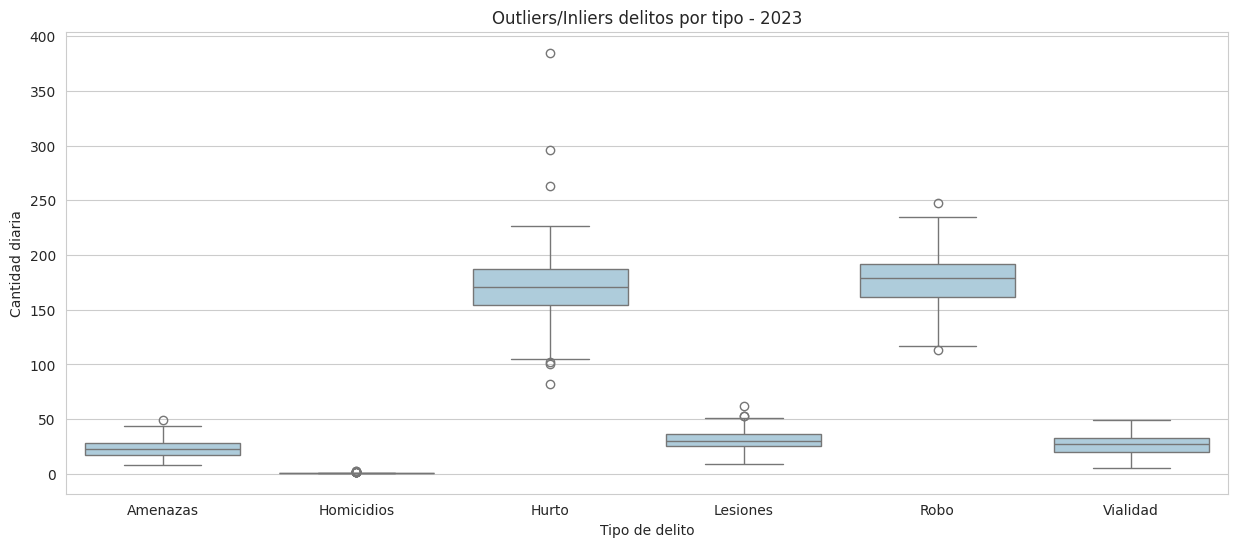

In [ ]:
# Detección de outliers Delitos por tipo

boxPlotDelitos = data[['fecha','tipo','cantidad']].groupby(['fecha','tipo']).count().reset_index()

fig,ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=boxPlotDelitos.tipo,y=boxPlotDelitos.cantidad)
ax.set_title(generarTitulo('Outliers/Inliers delitos por tipo'))
ax.set_xlabel('Tipo de delito')
ax.set_ylabel('Cantidad diaria');

In [ ]:
# Agrupo por fecha y nro de día para identificar cuándo se produjeron los outliers

outliers = data.loc[data['tipo'] == 'Hurto',['fecha','nro_dia','cantidad']].groupby(['fecha','nro_dia']).count().reset_index()

In [ ]:
outliers.loc[outliers['cantidad'] > 250]

,fecha,nro_dia,cantidad
310,2023-11-04,7,385
352,2023-12-15,6,263
356,2023-12-19,3,296


In [ ]:
# Calculo la media por comuna y barrio para los días sábados hasta antes de la fecha 04/11/2023
hurtosPrevios = data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 7) & (data['fecha'] < '2023-11-04'),['fecha','comuna','barrio','cantidad']].groupby(['fecha','comuna','barrio']).count().reset_index()

hurtosPrevios[['comuna','barrio','cantidad']].groupby(['comuna','barrio']).mean().reset_index()

,comuna,barrio,cantidad
0,1,CONSTITUCION,2.743590
1,1,MONSERRAT,3.069767
2,1,PUERTO MADERO,1.520000
3,1,RETIRO,3.558140
4,1,SAN NICOLAS,10.139535
5,1,SAN TELMO,3.125000
6,2,RECOLETA,7.813953
7,3,BALVANERA,11.139535
8,3,SAN CRISTOBAL,2.868421
9,4,BARRACAS,3.214286


In [ ]:
# Verifico la fecha problemática para identificar comunas y barrios con valores atípicos.

hurtosAArreglar = data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 7) & (data['fecha'] == '2023-11-04'),['comuna','barrio','cantidad']].groupby(['comuna','barrio']).count().reset_index()

In [ ]:
hurtosAArreglar

,comuna,barrio,cantidad
0,1,CONSTITUCION,9
1,1,MONSERRAT,121
2,1,RETIRO,6
3,1,SAN NICOLAS,93
4,1,SAN TELMO,1
5,2,RECOLETA,4
6,3,BALVANERA,14
7,3,SAN CRISTOBAL,1
8,4,BARRACAS,6
9,4,BOCA,2


In [ ]:
# Ahora voy a trabajar con los hurtos hasta el sábado anterior en la Comuna 1 para los barrios de Monserrat, por franja horaria para detectar los desvíos. Luego analizaré los del barrio San Nicolás.

hurtosComuna1PorFranja = data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 7) & (data['fecha'] < '2023-11-04') & (data['comuna'] == 1) & ((data['barrio'] == 'MONSERRAT') | (data['barrio'] == 'SAN NICOLAS')),['fecha','barrio','franja','cantidad']].groupby(['fecha','barrio','franja']).count().reset_index()

In [ ]:
hurtosComuna1PorFranja[['franja','barrio','cantidad']].groupby(['barrio','franja']).mean().reset_index()

,barrio,franja,cantidad
0,MONSERRAT,0,1.000000
1,MONSERRAT,1,1.000000
2,MONSERRAT,2,1.000000
3,MONSERRAT,3,1.250000
4,MONSERRAT,4,1.000000
5,MONSERRAT,5,1.000000
6,MONSERRAT,6,1.000000
7,MONSERRAT,7,1.000000
8,MONSERRAT,8,1.000000
9,MONSERRAT,9,1.000000


In [ ]:
data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 7) & (data['fecha'] == '2023-11-04') & (data['comuna'] == 1)& ((data['barrio'] == 'MONSERRAT') | (data['barrio'] == 'SAN NICOLAS')),['barrio','franja','cantidad']].groupby(['barrio','franja']).count().reset_index()

,barrio,franja,cantidad
0,MONSERRAT,6,1
1,MONSERRAT,14,12
2,MONSERRAT,15,16
3,MONSERRAT,16,20
4,MONSERRAT,17,16
5,MONSERRAT,18,17
6,MONSERRAT,19,13
7,MONSERRAT,20,12
8,MONSERRAT,21,7
9,MONSERRAT,22,6


In [ ]:
# Entre las 14 hs y las 22 hs hay valores que se encuentran muy por encima de la media para esa fecha.
# Como los sábados el promedio por franja horaria es muy cercano a uno, voy a eliminarlos.

data.drop(data[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 7) & (data['fecha'] == '2023-11-04') & (data['comuna'] == 1)& ((data['barrio'] == 'MONSERRAT') | (data['barrio'] == 'SAN NICOLAS')) & (data['franja'] > 13)].index,inplace=True)

In [ ]:
# Ahora voy a analizar los casos del 15/12/2023 - día 6
hurtosPrevios = data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 6) & (data['fecha'] < '2023-12-15'),['fecha','comuna','barrio','cantidad']].groupby(['fecha','comuna','barrio']).count().reset_index()


hurtosPrevios[['comuna','barrio','cantidad']].groupby(['comuna','barrio']).mean().reset_index()

,comuna,barrio,cantidad
0,1,CONSTITUCION,3.568182
1,1,MONSERRAT,4.571429
2,1,PUERTO MADERO,1.571429
3,1,RETIRO,4.173913
4,1,SAN NICOLAS,11.306122
5,1,SAN TELMO,2.600000
6,2,RECOLETA,10.346939
7,3,BALVANERA,12.000000
8,3,SAN CRISTOBAL,2.702128
9,4,BARRACAS,4.553191


In [ ]:
data.loc[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 6) & (data['fecha'] == '2023-12-15'),['comuna','barrio','cantidad']].groupby(['comuna','barrio']).count().reset_index()

,comuna,barrio,cantidad
0,1,CONSTITUCION,4
1,1,MONSERRAT,6
2,1,PUERTO MADERO,1
3,1,RETIRO,3
4,1,SAN NICOLAS,10
5,1,SAN TELMO,4
6,2,RECOLETA,14
7,3,BALVANERA,23
8,3,SAN CRISTOBAL,3
9,4,BARRACAS,5


In [ ]:
# Balvanera, Almagro, Flores, Liniers y Villa Devoto tienen delitos por hurto que superan ampliamente la media, por lo tanto voy a eliminar esos datos

data.drop(data[(data['tipo'] == 'Hurto') & (data['nro_dia'] == 6) & (data['fecha'] == '2023-12-15') & ((data['barrio'] == 'BALVANERA') | (data['barrio'] == 'ALMAGRO') | (data['barrio'] == 'FLORES') | (data['barrio'] == 'LINIERS') | (data['barrio'] == 'VILLA DEVOTO'))].index,inplace=True)

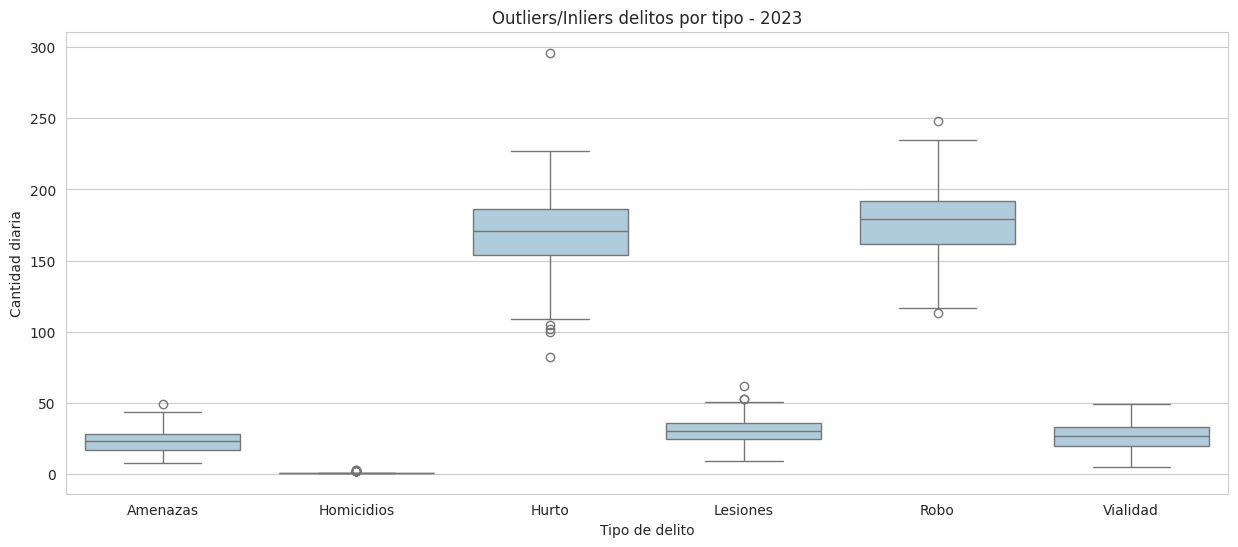

In [ ]:
# Verifico cómo quedaron los outliers

boxPlotDelitos = data[['fecha','tipo','cantidad']].groupby(['fecha','tipo']).count().reset_index()

fig,ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=boxPlotDelitos.tipo,y=boxPlotDelitos.cantidad)
ax.set_title(generarTitulo('Outliers/Inliers delitos por tipo'))
ax.set_xlabel('Tipo de delito')
ax.set_ylabel('Cantidad diaria');

## Visualizaciones

### Distribución de delitos por tipo

Identificados dos tipos de delito de mayor ocurrencia: Hurto y Robo
Dentro de los subtipos, Hurto Total (del tipo Hurto) y Robo Total (del tipo Robo)

In [ ]:
# Seteo parámetros para los gráficos

sns.set_style('whitegrid')
sns.set_palette('Paired')

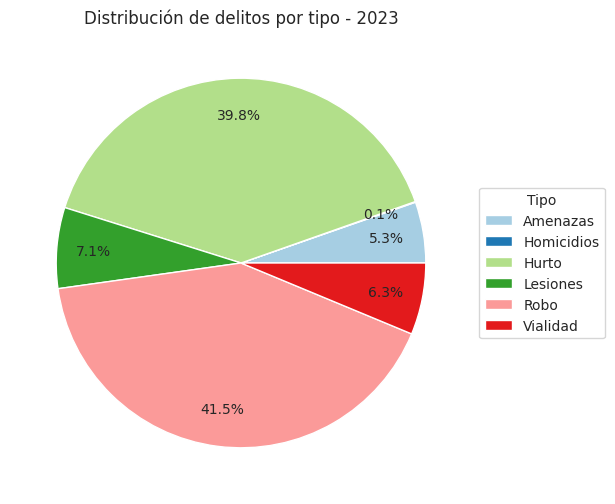

In [ ]:
data1 = data[['cantidad','tipo']].groupby(['tipo']).count().reset_index()
fig,ax = plt.subplots(figsize=(15,6))
ax.pie(data1.cantidad,autopct='%1.1f%%',pctdistance=0.8)
ax.set_title(generarTitulo('Distribución de delitos por tipo'));
ax.legend(data1.tipo,loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),title='Tipo');

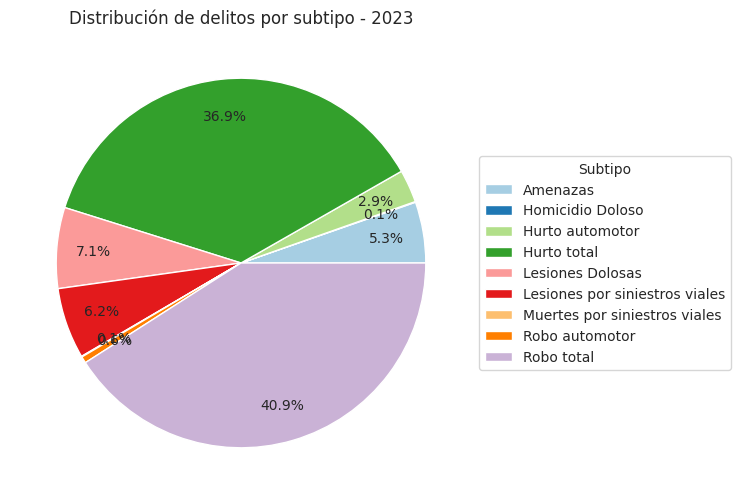

In [ ]:
data1b = data[['cantidad','subtipo']].groupby(['subtipo']).count().reset_index()
fig,ax = plt.subplots(figsize=(15,6))
ax.pie(data1b.cantidad,autopct='%1.1f%%',pctdistance=0.8)
ax.set_title(generarTitulo('Distribución de delitos por subtipo'))
ax.legend(data1b.subtipo,loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),title='Subtipo');

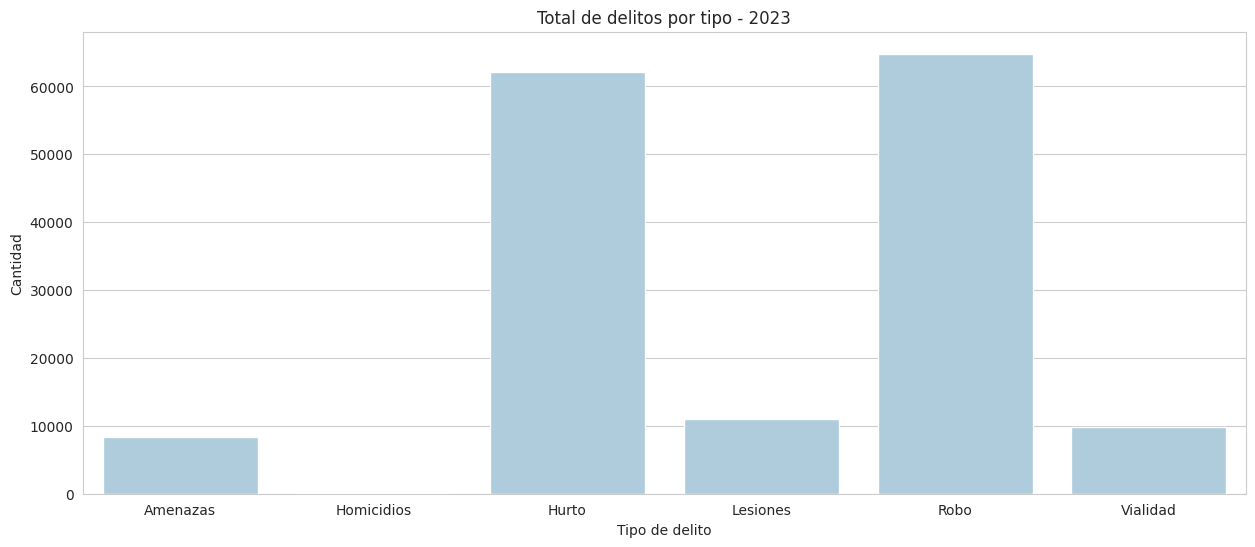

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(data=data1,x='tipo',y='cantidad')
ax.set_title(generarTitulo('Total de delitos por tipo'))
ax.set_xlabel('Tipo de delito')
ax.set_ylabel('Cantidad');

### Delitos por día

Se identifica una cantidad total por día semanal homogenea. El día domingo presenta menor cantidad de denuncias.

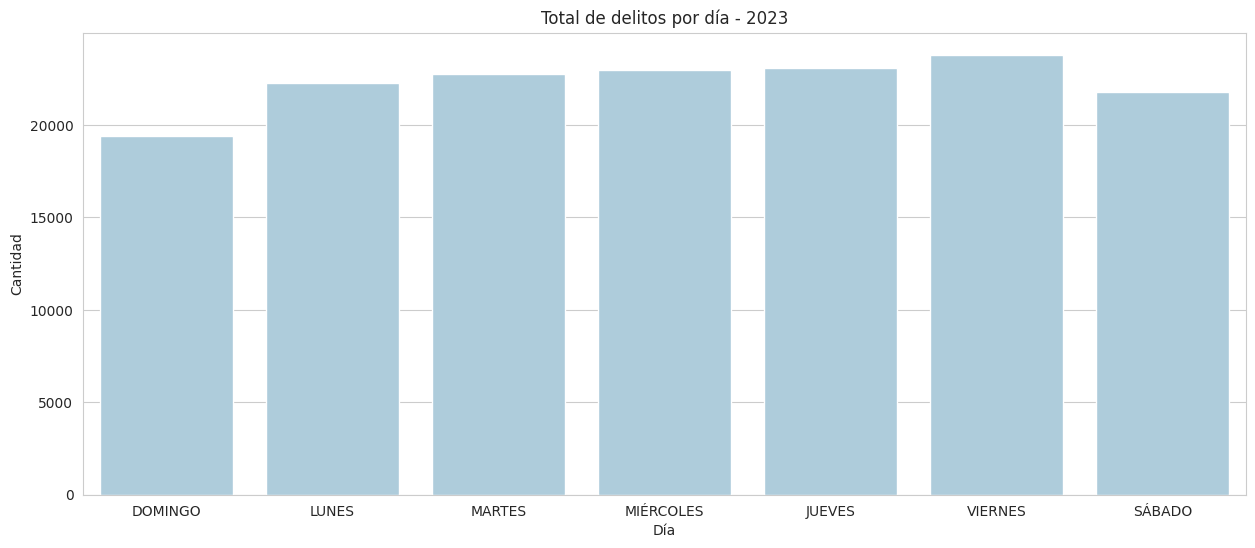

In [ ]:
data2 = data[['nro_dia','dia','tipo','cantidad']].groupby(['nro_dia','dia','tipo']).count().reset_index()

fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(data=data2,x='dia',y='cantidad',estimator='sum',errorbar=None)
ax.set_title(generarTitulo('Total de delitos por día'))
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad');

### Delitos por comuna

Se identifica a la Comuna 1 como la comuna con mayor cantidad de delitos.

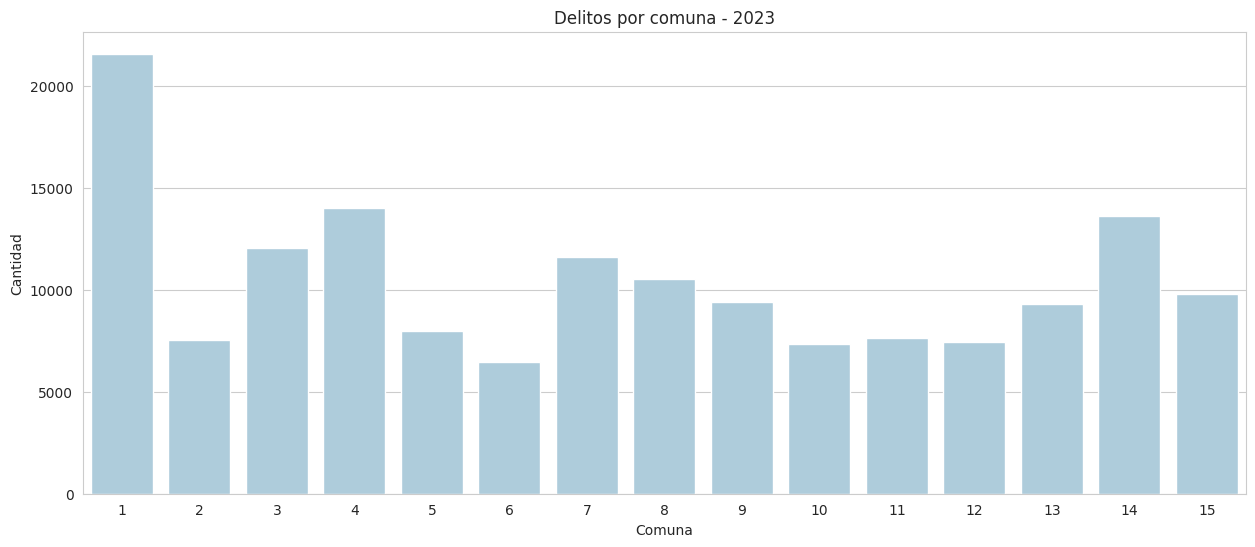

In [ ]:
data5 = data[['comuna','cantidad']].groupby(['comuna']).count().reset_index()

fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=data5.comuna, y=data5.cantidad)
ax.set_title(generarTitulo('Delitos por comuna'))
ax.set_xlabel('Comuna')
ax.set_ylabel('Cantidad');

### Delitos por barrio (Comuna 1)

Se identifica al barrio de San Nicolás como el barrio con mayor denuncia de delitos, seguido de Constitución, Retiro y Monserrat.

Los delitos más comunes en estos barrios son Hurto y Robo, y en el caso de Constitución es el que presenta más delitos de Lesiones.

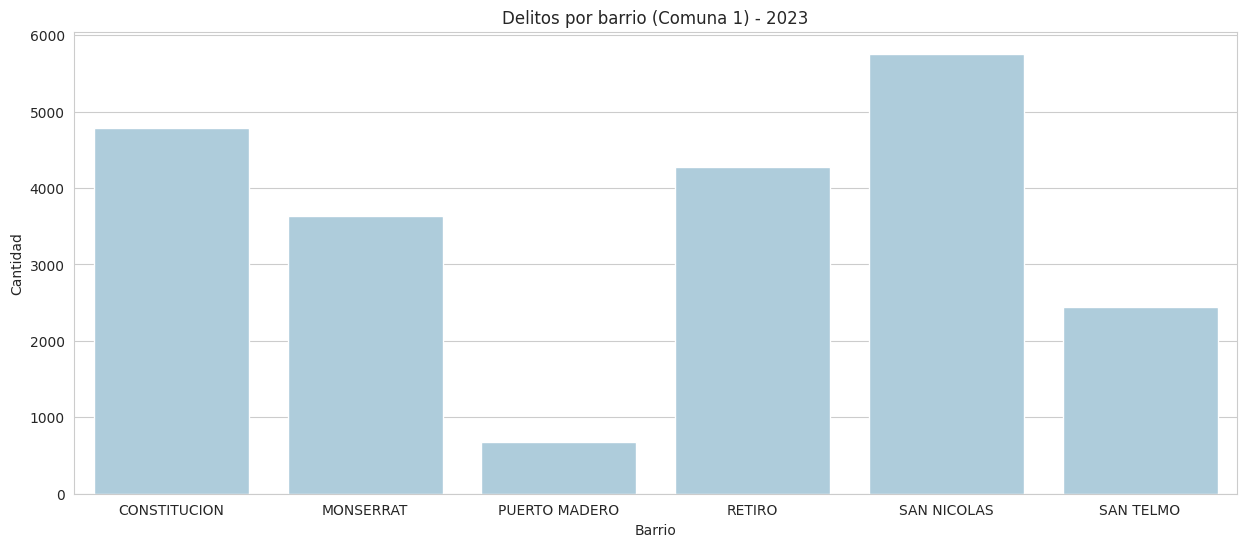

In [ ]:
delitosPorBarrioComuna1 = data.loc[data['comuna'] == 1,['barrio','cantidad']].groupby(['barrio']).count()

fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=delitosPorBarrioComuna1.index, y=delitosPorBarrioComuna1.cantidad)
ax.set_title(generarTitulo('Delitos por barrio (Comuna 1)'))
ax.set_xlabel('Barrio')
ax.set_ylabel('Cantidad');

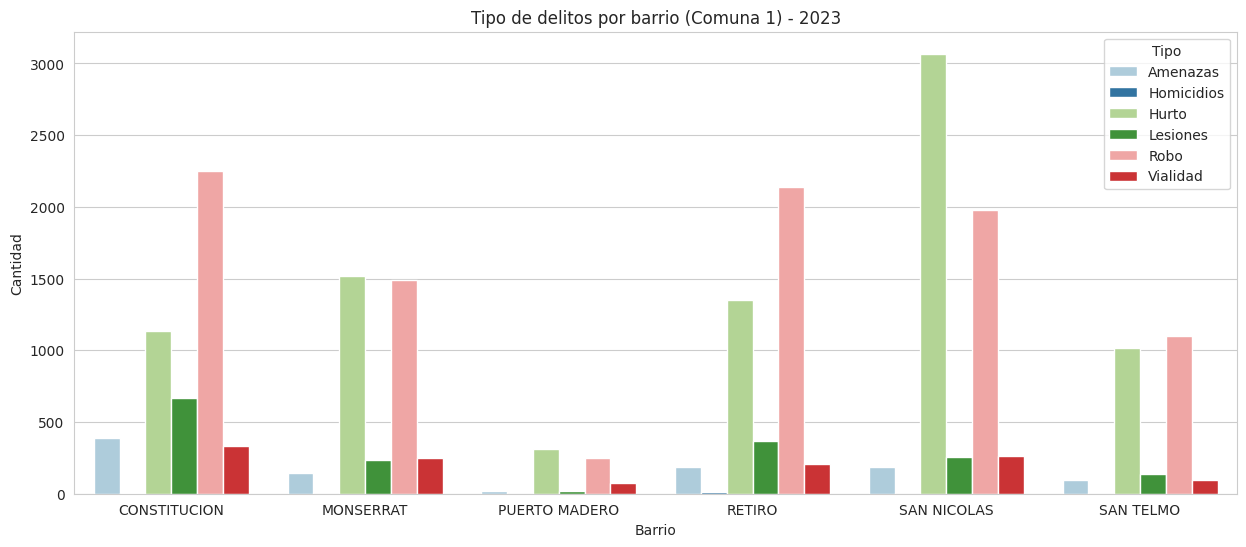

In [ ]:
delitosPorBarrioPorTipoComuna1 = data.loc[data['comuna'] == 1,['barrio','tipo','cantidad']].groupby(['barrio','tipo']).count().reset_index()

fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=delitosPorBarrioPorTipoComuna1.barrio, y=delitosPorBarrioPorTipoComuna1.cantidad, hue=delitosPorBarrioPorTipoComuna1.tipo)
ax.set_title(generarTitulo('Tipo de delitos por barrio (Comuna 1)'))
ax.set_xlabel('Barrio')
ax.set_ylabel('Cantidad')
ax.legend(title='Tipo');

### Evolución mensual de delitos

Se identifica una disminución en febrero del total de delitos (explicado por la disminución de robos y hurtos), coincidente con el período de receso de verano.
En marzo aumenta este tipo de delitos y no vuelve a disminuir a niveles de febrero en el resto del año. En diciembre alcanza el pico total de marzo nuevamente.

Para analizar enero se recomienda incorporar datos del 2021 y 2022.

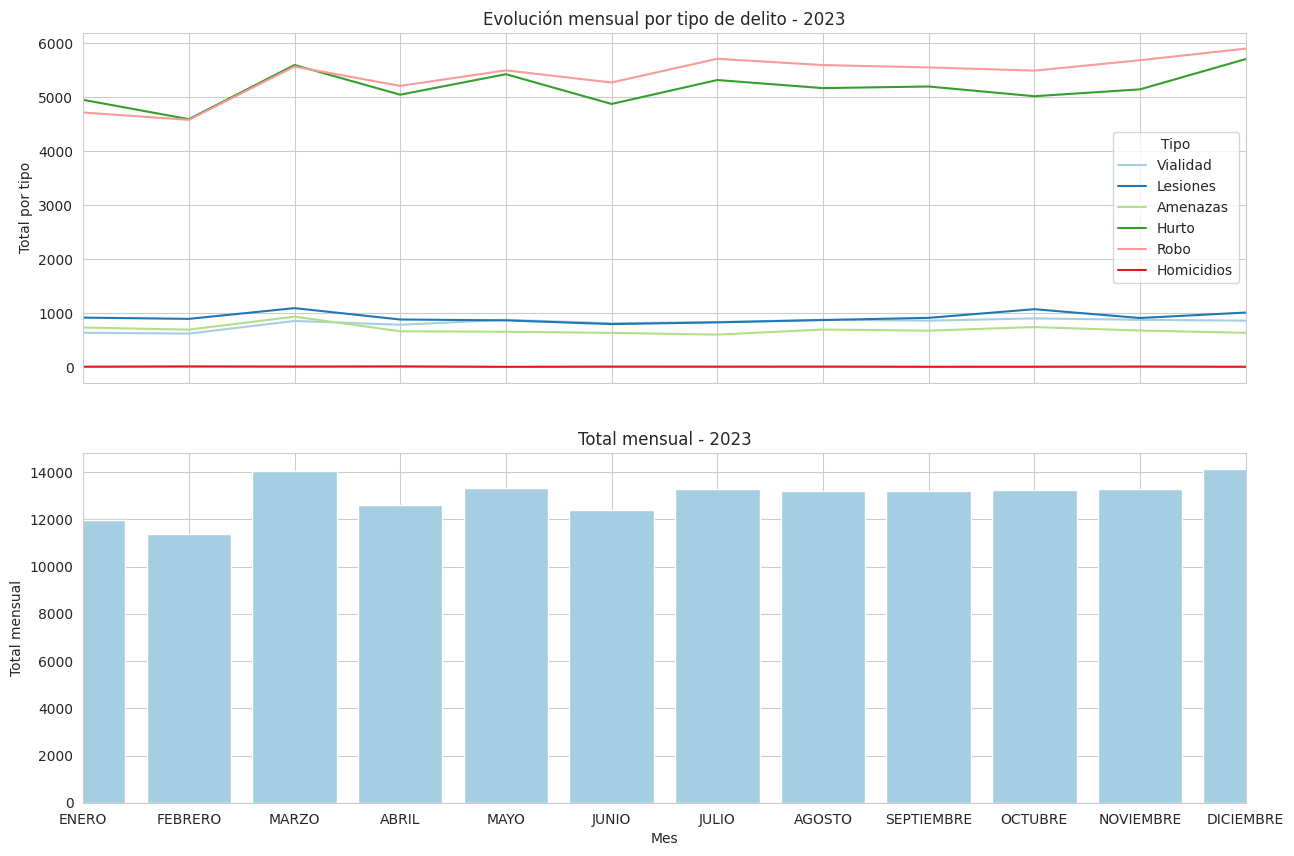

In [ ]:
preEvolucionMensual = data[['nro_mes','mes','tipo','cantidad']].groupby(['nro_mes','mes','tipo']).count().reset_index()

evolucionMensual = preEvolucionMensual.pivot(index='nro_mes',columns='tipo',values='cantidad')

totalMensual = data[['nro_mes','cantidad']].groupby(['nro_mes']).count().reset_index()

fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=1,sharex=True)
for idx,tipo in enumerate(data.tipo.unique()):
  ax[0].plot(evolucionMensual.index, evolucionMensual[tipo],label=tipo,alpha=1)
  ax[0].set_title(generarTitulo(f'Evolución mensual por tipo de delito'))
  ax[0].set_ylabel('Total por tipo')
  ax[0].set_xlim(evolucionMensual.index[0],evolucionMensual.index[-1])
  ax[0].legend(title='Tipo')

ax[1].bar(totalMensual.nro_mes,totalMensual.cantidad)
ax[1].set_title(generarTitulo('Total mensual'))
ax[1].set_xticks(data.nro_mes.unique())
ax[1].set_xticklabels(data.mes.unique());
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Total mensual');

### Delitos por franja horaria

Se puede identificar fácilmente que entre lunes y viernes en los horarios de mayor movimiento de gente (7 a 9 hs, 12 a 13 hs y 17 a 21 hs) se comenten más delitos.

En el caso de la Comuna 1, desde las 12 hs hasta las 23 hs, se encuentra la franja horaria con mayor cantidad de denuncias.

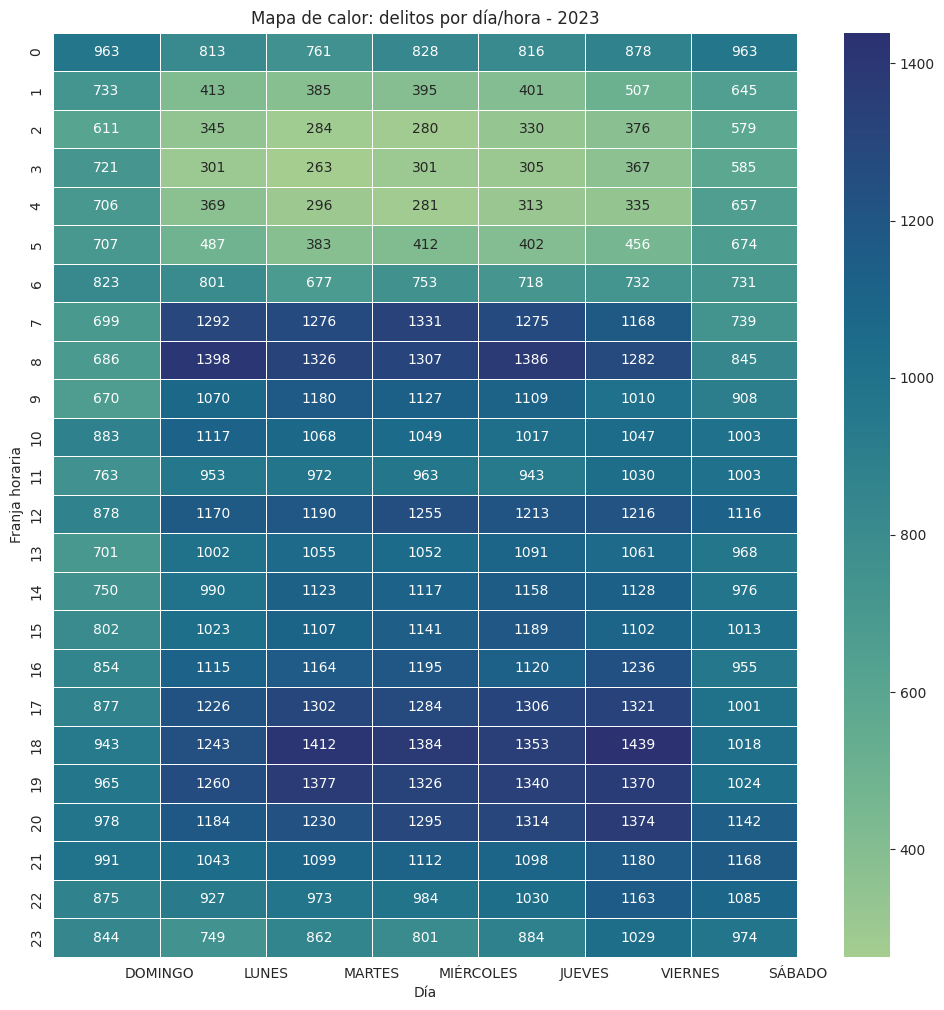

In [ ]:
preDelitosPorHora = data[['nro_dia','dia','franja','cantidad']].groupby(['nro_dia','dia','franja']).sum().reset_index()

delitosPorHora = preDelitosPorHora.pivot(index='franja',columns='nro_dia',values='cantidad')

fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(delitosPorHora,annot=True,cmap='crest',linewidths=.5,fmt='')
ax.set_title(generarTitulo('Mapa de calor: delitos por día/hora'))
ax.set_xlabel('Día')
ax.set_ylabel('Franja horaria')
ax.set_xticks(data.nro_dia.unique())
ax.set_xticklabels(data.dia.unique());

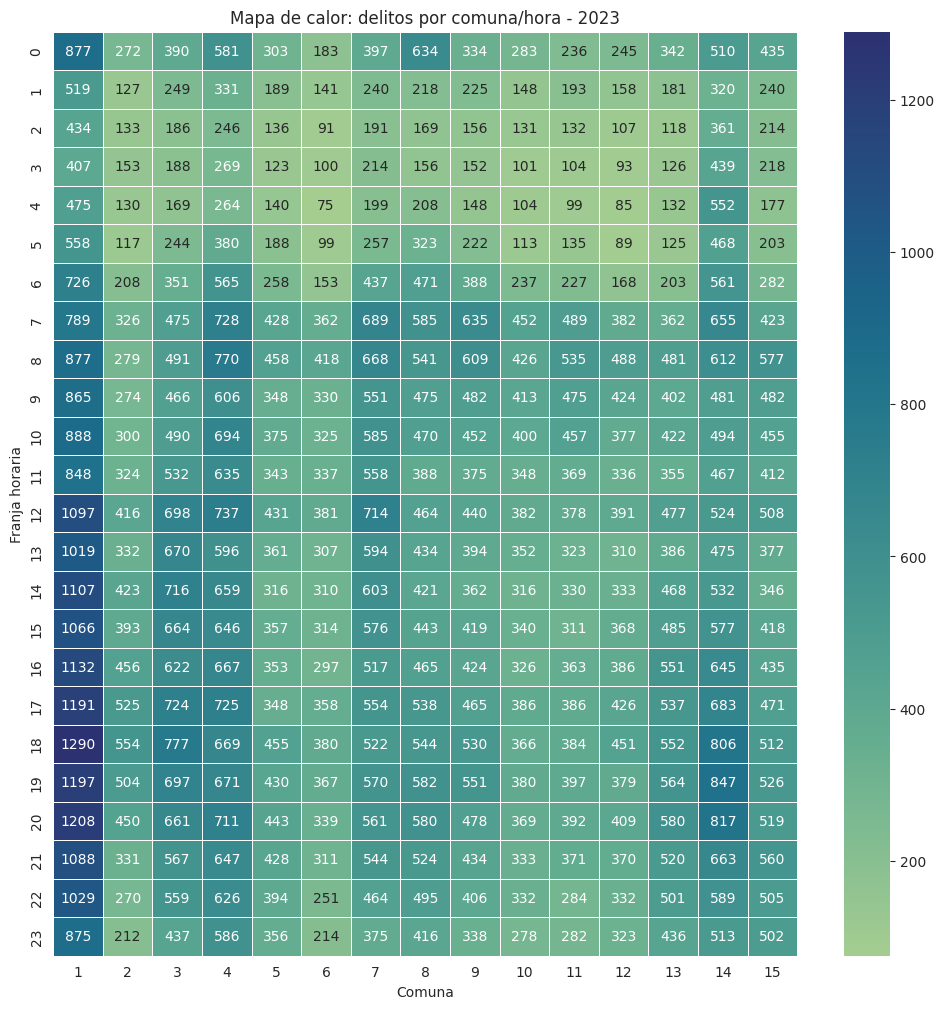

In [ ]:
preDelitosPorComuna = data[['comuna','franja','cantidad']].groupby(['comuna','franja']).sum().reset_index()

delitosPorComuna = preDelitosPorComuna.pivot(index='franja',columns='comuna',values='cantidad')

fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(delitosPorComuna,annot=True,cmap='crest',linewidths=.5,fmt='')
ax.set_title(generarTitulo('Mapa de calor: delitos por comuna/hora'))
ax.set_xlabel('Comuna')
ax.set_ylabel('Franja horaria');

## Preprocesamiento de datos

In [ ]:
data['tipo'].value_counts()

,count
tipo,
Robo,64813
Hurto,62075
Lesiones,11045
Vialidad,9786
Amenazas,8332
Homicidios,91


In [ ]:
# Genero las dummies para el tipo de delito

data_dummies = pd.get_dummies(data,columns=['tipo'],dtype='int')

In [ ]:
data_dummies.head()

,id-sum,anio,mes,dia,fecha,franja,subtipo,uso_arma,uso_moto,barrio,comuna,cantidad,nro_mes,nro_dia,tipo_Amenazas,tipo_Homicidios,tipo_Hurto,tipo_Lesiones,tipo_Robo,tipo_Vialidad
0,1,2023,ENERO,LUNES,2023-01-02,19,Muertes por siniestros viales,0,0,BELGRANO,13,1,1,2,0,0,0,0,0,1
1,2,2023,ENERO,MIÉRCOLES,2023-01-11,11,Muertes por siniestros viales,0,0,VILLA LUGANO,8,1,1,4,0,0,0,0,0,1
2,3,2023,ENERO,VIERNES,2023-01-13,4,Muertes por siniestros viales,0,0,SAAVEDRA,12,1,1,6,0,0,0,0,0,1
3,4,2023,ENERO,VIERNES,2023-01-13,6,Muertes por siniestros viales,0,0,PARQUE CHACABUCO,7,1,1,6,0,0,0,0,0,1
4,5,2023,ENERO,VIERNES,2023-01-13,6,Muertes por siniestros viales,0,0,PARQUE CHACABUCO,7,1,1,6,0,0,0,0,0,1


In [ ]:
# Elimino las columnas que no voy a utilizar

data_dummies.drop(columns=['id-sum','fecha','anio','mes','dia','subtipo','barrio'],inplace=True)

In [ ]:
# Sumarizo la cantidad de delitos por día de la semana, mes, uso_arma, uso_moto y tipos de delito

data_sumada = data_dummies[['comuna','nro_dia','nro_mes','uso_arma','uso_moto','tipo_Homicidios','tipo_Hurto','tipo_Lesiones','tipo_Robo','tipo_Vialidad','tipo_Amenazas','cantidad']].groupby(['comuna','nro_dia','nro_mes','uso_arma','uso_moto','tipo_Homicidios','tipo_Hurto','tipo_Lesiones','tipo_Robo','tipo_Vialidad','tipo_Amenazas']).count().reset_index()

In [ ]:
data_sumada.head()

,comuna,nro_dia,nro_mes,uso_arma,uso_moto,tipo_Homicidios,tipo_Hurto,tipo_Lesiones,tipo_Robo,tipo_Vialidad,tipo_Amenazas,cantidad
0,1,1,1,0,0,0,0,0,0,0,1,8
1,1,1,1,0,0,0,0,0,0,1,0,15
2,1,1,1,0,0,0,0,0,1,0,0,101
3,1,1,1,0,0,0,0,1,0,0,0,28
4,1,1,1,0,0,0,1,0,0,0,0,101


## Modelos

Voy a realizar una regresión lineal múltimple. Para saber si el modelo es correcto, además de verficar el R2 y otros indicadores, el mismo debe mantener los siguientes supuestos:

1. Para cada residuo o error, su valor medio debe ser 0.

2. No existe correlación entre los residuos.

3. Los residuos siguen una distribución normal.

4. Los residuos son homoscedásticos, esto quiere decir que todos tiene la misma varianza.

5. No existe relación lineal perfecta entre los parámetros (no hay multicolinealidad perfecta)


### Importación de librerías

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smodel

In [ ]:
data_sumada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   comuna           9242 non-null   int64
 1   nro_dia          9242 non-null   int64
 2   nro_mes          9242 non-null   int64
 3   uso_arma         9242 non-null   int64
 4   uso_moto         9242 non-null   int64
 5   tipo_Homicidios  9242 non-null   int64
 6   tipo_Hurto       9242 non-null   int64
 7   tipo_Lesiones    9242 non-null   int64
 8   tipo_Robo        9242 non-null   int64
 9   tipo_Vialidad    9242 non-null   int64
 10  tipo_Amenazas    9242 non-null   int64
 11  cantidad         9242 non-null   int64
dtypes: int64(12)
memory usage: 866.6 KB


In [ ]:
data_sumada.tail()

,comuna,nro_dia,nro_mes,uso_arma,uso_moto,tipo_Homicidios,tipo_Hurto,tipo_Lesiones,tipo_Robo,tipo_Vialidad,tipo_Amenazas,cantidad
9237,15,7,12,0,0,0,0,0,0,1,0,7
9238,15,7,12,0,0,0,0,0,1,0,0,52
9239,15,7,12,0,0,0,0,1,0,0,0,11
9240,15,7,12,0,0,0,1,0,0,0,0,68
9241,15,7,12,1,0,0,0,0,1,0,0,3


### Primer modelo

In [ ]:
# Para el primer modelo voy a utilizar todas las variables para estimar la cantidad de delitos por día de la semana, comuna y tipo

X = data_sumada.drop(columns=['cantidad'])
Y = data_sumada.cantidad

In [ ]:
# Separo los datos para entrenar el model y luego testearlo

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [ ]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
mse = mean_absolute_error(Y_test,Y_pred)

In [ ]:
print(mse)

8.319915463149298


In [ ]:
r2 = r2_score(Y_test,Y_pred)
r2

0.6499223180041507

El R2 del 65% es más bajo de lo esperado. Ahora voy a analizar la salida del modelo para ver si hay otros problemas. Luego realizaré una forward selection para ver si hay parámetros a eliminar.

In [ ]:
model1 = 'cantidad~comuna + nro_dia + nro_mes + uso_arma + uso_moto + tipo_Homicidios + tipo_Hurto + tipo_Lesiones + tipo_Robo + tipo_Vialidad + tipo_Amenazas'
lm1 = smodel.ols(formula=model1,data= data_sumada).fit()

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1756.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                -36321.
No. Observations:                9242   AIC:                         7.266e+04
Df Residuals:                    9231   BIC:                         7.274e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.1692      0.418     41.096      0.000      16.350      17.988
comuna             -0.5127      0.030    -17.279      0.000      -0.571      -0.455
nro_dia             0.2552      0.064      3.966      0.000       0.129       0.381
nro_mes             0.1620      0.037      4.371      0.000       0.089       0.235
uso_arma          -21.8779      0.389    -56.300      0.000     -22.640     -21.116
uso_moto          -24.8070      0.393    -63.187      0.000     -25.577     -24.037
tipo_Homicidios   -14.9185      1.158    -12.881      0.000     -17.189     -12.648
tipo_Hurto         34.1249      0.374     91.246      0.000      33.392      34.858
tipo_Lesiones      -6.2865      0.375    -16.761      0.000      -7.022      -5.551
tipo_Robo          20.0171      0.352     56.849      0.000      19.327      20.707
tipo_Vialidad      -7.3269      0.375    -19.542      0.000      -8.062      -6.592
tipo_Amenazas      -8.4409      0.376    -22.463      0.000      -9.177      -7.704
==============================================================================
Omnibus:                     4482.812   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39387.622
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      12.162   Cond. No.                     1.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.74e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

La salida nos muestra un estadístico F que nos indica que el modelo es significativo a nivel general (esto quiere decir que al menos uno de los parámetros es estadísticamente significativo - distinto de 0).

Todos los parámetros son significativos, lo cual es bueno.

Ahora comienzan los problemas:

- Tanto el coeficiente Omnibus como el Jarque-Bera indican que la distribución de los residos no sigue una distribución normal. Esto también podría indicar presencia de heteroscedasticisas.

- El coeficiente de Durwin-Watson indica que existe una leve autocorrelación entre los residuos (el valor debe ser cercano a 2 para que no exista este problema)

- La misma salida nos indica que existen indicions de fuerte multicolinealidad.


Voy a realizar una forward selection para ver si hay parámetros a eliminar y verificar si alguno de estos problemas se puede solucionar.

In [ ]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,Y)

['tipo_Hurto',
 'uso_moto',
 'tipo_Robo',
 'uso_arma',
 'comuna',
 'tipo_Homicidios',
 'nro_mes',
 'nro_dia',
 'tipo_Amenazas']

### Segundo modelo

Voy a estimar nuevamente el modelo para ver si algún indicador ha mejorado.

In [ ]:
model2 = 'cantidad~comuna + nro_dia + nro_mes + uso_arma + uso_moto + tipo_Homicidios + tipo_Hurto + tipo_Robo + tipo_Amenazas'
lm2 = smodel.ols(formula=model2,data= data_sumada).fit()


In [ ]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1950.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:59:12   Log-Likelihood:                -36323.
No. Observations:                9242   AIC:                         7.267e+04
Df Residuals:                    9232   BIC:                         7.274e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3640      0.491     21.089      0.000       9.401      11.327
comuna             -0.5127      0.030    -17.276      0.000      -0.571      -0.455
nro_dia             0.2548      0.064      3.960      0.000       0.129       0.381
nro_mes             0.1619      0.037      4.367      0.000       0.089       0.235
uso_arma          -21.8779      0.389    -56.290      0.000     -22.640     -21.116
uso_moto          -24.8071      0.393    -63.175      0.000     -25.577     -24.037
tipo_Homicidios    -8.1113      1.370     -5.922      0.000     -10.796      -5.426
tipo_Hurto         40.9324      0.426     96.105      0.000      40.098      41.767
tipo_Robo          26.8246      0.398     67.367      0.000      26.044      27.605
tipo_Amenazas      -1.6333      0.428     -3.816      0.000      -2.472      -0.794
==============================================================================
Omnibus:                     4481.711   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39323.146
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      12.153   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Habría mejorado el problema de multicolinealidad únicamente. El valor Cond No debe ser menor a 30 para que no exista el problema de multicolinealidad.

Ahora voy a verificar la existencia de heteroscedasticidad.

In [ ]:
import statsmodels.stats.diagnostic as diagnostic

In [ ]:
# Prueba de Breusch-Pagan

def detectarHeteroscedasticidad(modelo,pvalue):
    bp = diagnostic.het_breuschpagan(modelo.resid, modelo.model.exog)[1]

    if bp > pvalue:
        print('La relación NO ES heteroscedástica.')
    else:
        print('La relación ES heteroscedástica.')

In [ ]:
detectarHeteroscedasticidad(lm2, 0.05)

La relación ES heteroscedástica.


Ahora voy a realizar una prueba VIF (Variance Inflation Factor) para detectar qué parámetros tiene fuerte multicolinealidad. Aquellos cuyo valor sea cercano a 1 no presentan este problema.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Prueba de multicolinealidad

X_2 = data_sumada[['comuna', 'nro_dia', 'nro_mes', 'uso_arma', 'uso_moto',
        'tipo_Homicidios', 'tipo_Hurto', 'tipo_Robo', 'tipo_Amenazas']]

In [ ]:
X_2 = sm.add_constant(X_2)

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_2.columns
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]

# Imprime los resultados
print(vif_data)


          Variable        VIF
0            const  14.687668
1           comuna   1.003447
2          nro_dia   1.000933
3          nro_mes   1.000488
4         uso_arma   1.451622
5         uso_moto   1.400472
6  tipo_Homicidios   1.027480
7       tipo_Hurto   1.298956
8        tipo_Robo   2.386209
9    tipo_Amenazas   1.295475


De los parámetros el que tiene mayor problema es tipo_Robo, y luego uso_arma y uso_moto

## Conclusiones

### Del análisis de los datos

En la Ciudad Autónoma de Buenos Aires, a lo largo del año 2023 se denunciaron más de 156.000 delitos, de los cuales el 80% corresponde a los tipos de robo y hurto.

De lunes a viernes son los días con mayor cantidad de denuncias, especialmente en las franjas de 7 a 9 hs, de 12 a 13 hs y de 17 a 21 hs.

La Comuna 1 es la columna donde más denuncias se producen, principalmente en la franja horaria que va desde las 12 a las 23 hs.

El barrio con más denuncias dentro de la Comuna 1 es San Nicolás, seguido por Constitución, Retiro y Monserrat.

Con los datos que se tienen se identifica una disminución de delitos en el mes de febrero y un fuerte aumento en marzo, especialmente por los tipos de robo y hurto.

### De los modelos

Con el dataset no se logra generar un modelo de regresión múltiple con un R2 adecuado. Además existen problemas que violan algunos de los supuestos del modelo clásico.

En el caso de la multicolinealidad, el problema no es severo, especialmente si el único objetivo es predecir.

Respecto de la presencia de heteroscedasticidad y autocorrelación, la misma no destruye las propiedades de insesgamiento y consistencia de los estimadores OLS, sin embargo éstos dejan de tener varianza mínina, ya no son BLUE (Best Linear Unbiased Estimator, propiedad definida por el teorena de Gauss-Markov).

Para solucionar estos problemas hay distintos enfoques, como realizar transformaciones del modelo (modelos log-lineal por ejemplo), probar el método GLS (Generalized Least Squares) en vez del método OLS o usar modelos ARCH-GARCH o modelos ARIMA (Autoregresive-Integrated-Moving Average) para trabajar con series de tiempo.

La presencia de todos estos problemas lo que genera es que la varianza en la predicció no es mínima, por lo que se podrían generar errores.



## Recomendaciones

Se sugiere incorporar datos de períodos anteriores para tener un set de datos más grande para realizar una mejor estimación.

También se recomienta realizar pruebas para verificar la especificación del modelo.

Adicionalmente se sugiere probar modelos y métodos alternativos. El único inconveniente de ésto es que la interpretación de los resultados muchas veces puede dificultarse.

## Bonus Track

Esta sección la incluí simplemente como una curiosidad en función a lo que estuve investigando y "jugando" para solucionar algunas de las violaciones a los supuestos clásicos del modelo.

### Probando soluciones para la autocorrelación de los residuos


In [ ]:
# Pruebo con el modelo de Cochrane-Orcutt que utiliza el test de autocorrelación de Ljung-Box.
# Calcula un rho para transformar las variables dependientes e independiente.

from statsmodels.stats.diagnostic import acorr_ljungbox

X_3 = data_sumada[['comuna', 'nro_dia', 'nro_mes', 'uso_arma', 'uso_moto',
        'tipo_Homicidios', 'tipo_Hurto', 'tipo_Robo', 'tipo_Amenazas']]
Y_3 = data_sumada['cantidad']
X_3 = sm.add_constant(X_3)

model = sm.OLS(Y_3, X_3).fit()

In [ ]:
print(acorr_ljungbox(model.resid, lags=[5], return_df=True))

       lb_stat      lb_pvalue
5  1286.937174  4.318275e-276


In [ ]:
rho = model.resid.autocorr(lag=5)

In [ ]:
y_t = Y_3[1:] - rho * Y_3[:-1].values
X_t = X_3[1:] - rho * X_3[:-1].values

In [ ]:
model_cochrane_orcutt = sm.OLS(y_t, X_t).fit()

In [ ]:
model_cochrane_orcutt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     2261.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:59:13   Log-Likelihood:                -36182.
No. Observations:                9241   AIC:                         7.238e+04
Df Residuals:                    9231   BIC:                         7.246e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.4443      0.551     17.140      0.000       8.364      10.524
comuna             -0.5098      0.035    -14.770      0.000      -0.577      -0.442
nro_dia             0.2550      0.075      3.412      0.001       0.108       0.401
nro_mes             0.1584      0.043      3.723      0.000       0.075       0.242
uso_arma          -21.6159      0.384    -56.241      0.000     -22.369     -20.863
uso_moto          -24.0120      0.370    -64.907      0.000     -24.737     -23.287
tipo_Homicidios    -7.5548      1.335     -5.660      0.000     -10.171      -4.938
tipo_Hurto         42.7417      0.399    107.156      0.000      41.960      43.524
tipo_Robo          27.6819      0.358     77.402      0.000      26.981      28.383
tipo_Amenazas      -1.0099      0.403     -2.504      0.012      -1.801      -0.219
==============================================================================
Omnibus:                     4309.214   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36889.435
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      11.892   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con este método se eliminó la autocorrelación, disminuyó la multicolinealidad y aumentó el R2.

Adicionalmente, se mantiene la significancia global del modolo y de cada uno de los parámetros estimados.

### Modelo log-lineal

In [ ]:
# Para trabajar sobre el problema de heteroscedasticidad hice la siguiente transformación sugerida para este tipo de problmas

data_sumada2 = data_sumada
data_sumada2.cantidad = np.log(data_sumada2.cantidad)

In [ ]:
lm4 = smodel.ols(formula=model2,data= data_sumada2).fit()


In [ ]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2594.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:59:13   Log-Likelihood:                -9417.7
No. Observations:                9242   AIC:                         1.886e+04
Df Residuals:                    9232   BIC:                         1.893e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0670      0.027     77.305      0.000       2.015       2.119
comuna             -0.0275      0.002    -17.029      0.000      -0.031      -0.024
nro_dia             0.0111      0.004      3.161      0.002       0.004       0.018
nro_mes             0.0046      0.002      2.298      0.022       0.001       0.009
uso_arma           -1.4596      0.021    -69.020      0.000      -1.501      -1.418
uso_moto           -2.0815      0.021    -97.429      0.000      -2.123      -2.040
tipo_Homicidios    -1.9135      0.075    -25.678      0.000      -2.060      -1.767
tipo_Hurto          1.9000      0.023     81.993      0.000       1.855       1.945
tipo_Robo           1.4124      0.022     65.195      0.000       1.370       1.455
tipo_Amenazas      -0.2774      0.023    -11.910      0.000      -0.323      -0.232
==============================================================================
Omnibus:                      323.236   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.621
Skew:                          -0.458   Prob(JB):                     4.92e-79
Kurtosis:                       3.312   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con esta transformación mejoró el R2, se mantuvo la significancia global del modelo y de cada paráemtro.

Existe mayor autocorrelación y multicolinealidad que con el ejemplo anterior.

In [ ]:
detectarHeteroscedasticidad(lm4,0.05)

La relación ES heteroscedástica.


### Probando dos métodos juntos

In [ ]:
# Ahora voy a implementar ambos casos en un único modelo.

X_4 = data_sumada2[['comuna', 'nro_dia', 'nro_mes', 'uso_arma', 'uso_moto',
        'tipo_Homicidios', 'tipo_Hurto', 'tipo_Robo', 'tipo_Amenazas']]
Y_4 = data_sumada2['cantidad']
X_4 = sm.add_constant(X_4)

model = sm.OLS(Y_4, X_4).fit()

In [ ]:
print(acorr_ljungbox(model.resid, lags=[5], return_df=True))

       lb_stat  lb_pvalue
5  2400.139578        0.0


In [ ]:
rho = model.resid.autocorr(lag=5)

In [ ]:
y_t_2 = Y_4[1:] - rho * Y_4[:-1].values
X_t_2 = X_4[1:] - rho * X_4[:-1].values

In [ ]:
model_cochrane_orcutt_2 = sm.OLS(y_t_2, X_t_2).fit()

In [ ]:
model_cochrane_orcutt_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3173.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:59:13   Log-Likelihood:                -9049.2
No. Observations:                9241   AIC:                         1.812e+04
Df Residuals:                    9231   BIC:                         1.819e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0126      0.031     64.492      0.000       1.951       2.074
comuna             -0.0274      0.002    -13.810      0.000      -0.031      -0.023
nro_dia             0.0116      0.004      2.711      0.007       0.003       0.020
nro_mes             0.0044      0.002      1.823      0.068      -0.000       0.009
uso_arma           -1.4636      0.020    -71.528      0.000      -1.504      -1.424
uso_moto           -2.0564      0.019   -106.576      0.000      -2.094      -2.019
tipo_Homicidios    -1.8406      0.070    -26.262      0.000      -1.978      -1.703
tipo_Hurto          2.0137      0.021     97.257      0.000       1.973       2.054
tipo_Robo           1.4709      0.018     80.495      0.000       1.435       1.507
tipo_Amenazas      -0.2303      0.021    -10.937      0.000      -0.272      -0.189
==============================================================================
Omnibus:                      294.435   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.709
Skew:                          -0.435   Prob(JB):                     1.88e-71
Kurtosis:                       3.299   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con estas transformaciones aumentó el R2, se mantuvo la significancia global del modelo. Perdió significancia estadístima el estimador para el nro_mes, pero se eliminó en gran parte la autocorrelación y disminuyó la multicolinealidad.
Se mantuvo la presencia de heteroscedasticidad según el resultado de abajo.

In [ ]:
detectarHeteroscedasticidad(model_cochrane_orcutt_2,0.05)

La relación ES heteroscedástica.
